In [4]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib 

Using matplotlib backend: Qt5Agg


# User input

In [ ]:
#list of (p,t) where p ist the lowest position with acquisition time t
pos_vs_acqtime = [(0,5),(80,4),(120,3),(200,2)] 

# construct acquisition time array 

In [ ]:
power_wheel_position = np.linspace(0,280,100) #up sweep
power_wheel_position = np.concatenate([power_wheel_position, power_wheel_position[::-1]]) #up down sweep
power_wheel_position = np.concatenate([power_wheel_position[50:150],power_wheel_position[150:-1], power_wheel_position[0:50]])#
plt.plot(power_wheel_position,'.', label='power_wheel_postion')
plt.ylabel('power_wheel_postion')

In [ ]:
x = power_wheel_position
# lowest position
acq_time_array = np.piecewise(x, [x < pos[1], x >= pos[1]], [time[0], 0]) 
plt.figure()
plt.plot(acq_time_array*50, '-.', label='acq_time_array of lowest position')
plt.legend()
 #highest position
acq_time_array += np.piecewise(x, [x >= pos[-1], x < pos[-1]], [time[-1], 0])
plt.figure()
plt.plot(acq_time_array*50, '-.', label='acq_time_array with highest position')
plt.legend()
# all other
for i in range(1,len(pos)-1):
    t = np.piecewise(x, [x < pos[i], x >= pos[i], x >= pos[i+1]], [0, time[i], 0])
    acq_time_array += t    
    
plt.figure()
plt.plot(power_wheel_position,'.', label='power_wheel_postion')
plt.plot(acq_time_array*50, '-.', label='~acq_time_array')
plt.legend()

In [ ]:
plt.figure()
plt.plot(power_wheel_position,acq_time_array)
plt.ylabel('acq_time_array')
plt.xlabel('power_wheel_postion')
plt.figure()

In [ ]:
def manual_input_2_acq_time_array(power_wheel_position, manual_pos_vs_times):
    pos,time = np.array(manual_pos_vs_times).T
    x = power_wheel_position
    # lowest position
    acq_time_array =  np.piecewise(x, [x < pos[1],   x >= pos[1]], [ time[0], 0]) 
    # highest position
    acq_time_array += np.piecewise(x, [x >= pos[-1], x < pos[-1]], [time[-1], 0])
    # all other
    for i in range(1,len(pos)-1):
        t = np.piecewise(x, [x < pos[i], x >= pos[i], x >= pos[i+1]], [0, time[i], 0])
        acq_time_array += t    
    return acq_time_array

In [152]:
acq_time_array = manual_2_acquisition_time_array(power_wheel_position, pos_vs_time)

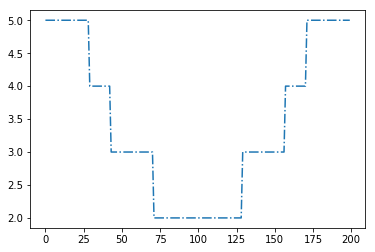

In [153]:
plt.plot(acq_time_array, '-.')